# Documentação

!pip install yfinance

### Artigo original:
https://towardsdatascience.com/how-to-create-a-fully-automated-ai-based-trading-system-with-python-708503c1a907

### Modelo ARIMA:
https://pt.wikipedia.org/wiki/ARIMA

### Uso do Auto-ARIMA:
https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd

In [1]:
ticker = "RBBV11.SA"

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [3]:
def get_finance_data(ticker, period='1y', interval='1d'):
    '''
    Função para capturar os dados dos ativos, acrescentar ".SA" no final do ticker para ativos 
    negociados na Bovespa, exemplo "PETR4.SA".
    Exemplo url base da API: https://query1.finance.yahoo.com/v7/finance/options/PETR4.SA?date=20201222
    Exemplo url scrape da API: https://finance.yahoo.com/quote/PETR4.SA
    
    Parameters
    ----------
    period: default '1y', periodos validos: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    inteval: default '1d', intervalos validos: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1d, 5d, 1wk, 1mo, 3mo.
    '''
    
    google = yf.Ticker(ticker)
    
    df = google.history(period=period, interval=interval)
#     df['date'] = pd.to_datetime(df.index).time
#     df.set_index('date', inplace=True)
    return df


def get_forecast(df, col_ref='Low'):
    # Assuming that we've properly trained the model before and that the 
    # hyperparameters are correctly tweaked, we use the full dataset to fit
    y = df[col_ref].values
    model = ARIMA(y, order=(7,1,2)).fit()
    forecast = model.forecast(steps=1)[0]

    # Returning the last real data and the forecast for the next minute
    return (y[len(y)-1], forecast)

In [4]:
df = get_finance_data(ticker)

get_forecast(df, col_ref='Close')

C:\Users\pedro\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\pedro\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARM

(94.98999786376953, array([94.61518321]))

In [5]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-16,93.010002,94.000000,93.010002,93.309998,764,0,0
2020-12-17,93.309998,94.849998,93.150002,94.050003,474,0,0
2020-12-18,93.500000,94.870003,93.139999,93.430000,480,0,0
2020-12-21,93.430000,95.000000,93.430000,94.589996,727,0,0
2020-12-22,94.500000,94.989998,94.500000,94.989998,469,0,0


In [6]:
df['Close'][-1]

94.98999786376953

In [7]:
ativo = yf.Ticker(ticker)

In [8]:
ativo.get_dividends()

Date
2017-09-04    0.183839
2017-10-03    0.269152
2017-11-03    0.243087
2017-12-04    0.499334
Name: Dividends, dtype: float64

### Tentando fazer auto arima

In [9]:
#! pip install pmdarima


In [10]:
from pmdarima.arima import auto_arima

In [11]:
df = get_finance_data(ticker)

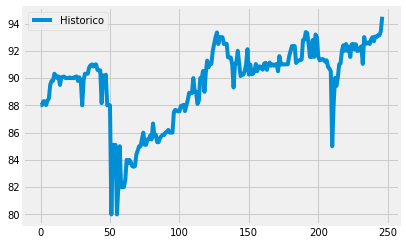

In [12]:
y = df['Low'].values
plt.plot(range(0,len(y)),y, label='Historico')
plt.legend()
plt.show()

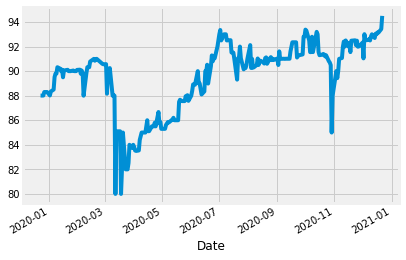

In [13]:
df['Low'].plot(label='Historico')

In [14]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df['Low'])

(0.5973855859781368, True)

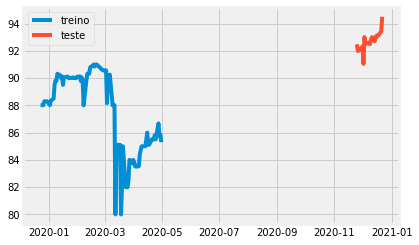

In [ ]:
train = df['Low'][:85]
test = df['Low'][-20:]
plt.plot(train, label='treino')
plt.plot(test, label='teste')
plt.legend()
plt.show()

In [ ]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, mas_d=5, max_q=5, start_P=0, D=1, start_Q=1, max_P=5, 
                         max_D=5, max_Q=5, m=12, seasonal=True, error_action='warn', trace=True, suppress_warnings=True, 
                         stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=314.479, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=290.393, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=308.764, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=281.093, Time=0.24 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=281.537, Time=0.39 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.08 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=3.13 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=288.527, Time=0.17 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=277.496, Time=0.27 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=286.914, Time=0.09 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=277.742, Time=0.60 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=

In [ ]:
arima_model.summary()

In [ ]:
prd = pd.DataFrame(arima_model.predict(n_periods=20), index=test.index)
prd.columns = ['Low']
prd

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train, label="treino")
plt.plot(test, label="teste")
plt.plot(prd, label="predicao")
plt.legend(loc='upper right')
plt.show